In [43]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection

import pickle

In [3]:
#read in data
data = pd.read_csv('spam.csv', usecols = [0,1], encoding='latin-1')
data.columns = ['label', 'text']
data['length'] = data.text.str.len()
#encode label of ['ham', 'spam'] into 1 and 0 and store as 'cat'
data['cat'] = data['label'].map({'ham' : 1, 'spam' : 0})
data.head()

,label,text,length,cat
0,ham,"Go until jurong point, crazy.. Available only ...",111,1
1,ham,Ok lar... Joking wif u oni...,29,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0
3,ham,U dun say so early hor... U c already then say...,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1


In [8]:
data.groupby('cat').describe()

length                                                         
      count        mean        std   min    25%    50%    75%    max
cat                                                                 
0     747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0
1    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0

In [9]:
##remove punc and stop
def remove_punc_stop(text):
    sen = [i for i in text if i not in string.punctuation]
    word = "".join(sen).split()
    word = [i.lower() for i in word if i.lower() not in stopwords.words("english")]
    word = " ".join(word)
    return word

#function to plot word cloud of the first 100 most common of words in the data with the given type
def plot_wordcloud(data, type):
    full_text = ''.join(data['cleaned text'][i] for i in range(len(data)) if data.cat[i] == type)
    wordcloud = WordCloud(max_words = 100, background_color="white").generate(full_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title((['spam', 'ham'][type]), fontsize = 20)

#function to plot frequency of the first most common of words in the data with the given type
# type indicates if 1: ham, 0: spam
# mostcommon indicates number of words listed in the plot
def plot_mostfreq(data, type, mostcommon):
    full = word_tokenize(''.join([data['cleaned text'][i] for i in range(len(data)) if data.cat[i] == type]))
    freq = nltk.FreqDist(full)
    freq.plot(mostcommon, title = (['spam', 'ham'][type]))

In [13]:
data['cleaned text'] = data.text.apply(remove_punc_stop)

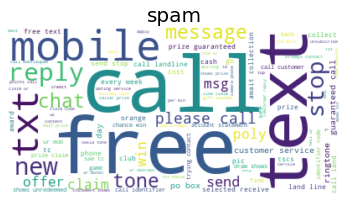

In [17]:
plot_wordcloud(data, 0)

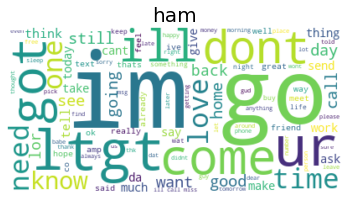

In [18]:
plot_wordcloud(data, 1)

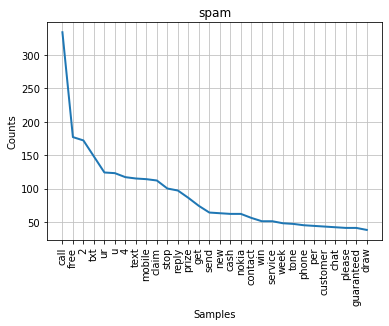

In [22]:
plot_mostfreq(data, 0, 30)

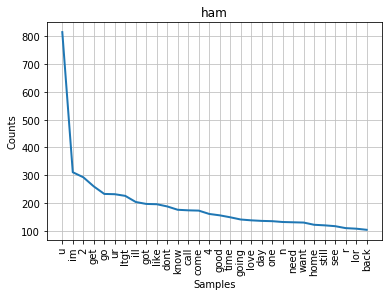

In [23]:
plot_mostfreq(data, 1, 30)

### Tokenizing and Vectorizing

In [44]:
##counting the occurrences of tokens in each document.
vectorizer = CountVectorizer()
data_X = vectorizer.fit_transform(data['cleaned text'])

##To avoid these potential discrepancies it suffices to divide the number of occurrences 
##of each word in a document by the total number of words in the document: 
##these new features are called tf for Term Frequencies.
vectorizer2 = TfidfVectorizer()
data_X2 = vectorizer2.fit_transform(data['cleaned text'])


### Split data

In [46]:
# to split dataset into training and test data
# will split into 15% of data into test data and set seed for random state
X_tr, X_te, y_tr, y_te = \
    model_selection.train_test_split(data_X, data.cat, test_size = 0.15, random_state = 42)

X_tr2, X_te2, y_tr2, y_te2 = \
    model_selection.train_test_split(data_X2, data.cat, test_size = 0.15, random_state = 42)

### Store training and test data to pass to each group

In [47]:
## store two feature matrix
with open('train_data.pkl','wb') as f:
    pickle.dump((X_tr, y_tr), f)
    
with open('test_data.pkl','wb') as f:
    pickle.dump((X_te, y_te), f)

with open('train_data2.pkl','wb') as f:
    pickle.dump((X_tr2, y_tr2), f)
    
with open('test_data2.pkl','wb') as f:
    pickle.dump((X_te2, y_te2), f)

In [48]:
## to read train and test data
with open('train_data.pkl', 'rb') as f:
      X_tr, y_tr = pickle.load(f)
        
with open('test_data.pkl', 'rb') as f:
      X_te, y_te = pickle.load(f)
        

with open('train_data2.pkl', 'rb') as f:
      X_tr2, y_tr2 = pickle.load(f)
        
with open('test_data2.pkl', 'rb') as f:
      X_te2, y_te2 = pickle.load(f)